In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("fiat500.csv")

In [3]:
data

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
...,...,...,...,...,...,...,...,...,...
1533,1534,sport,51,3712,115280,1,45.069679,7.704920,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.666870,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.413480,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.682270,5990


In [4]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1538 non-null   int64  
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 108.3+ KB


In [6]:
data.head()

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [7]:
data.tail(10)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
1528,1529,lounge,51,2861,126000,1,43.841980,10.51531,5500
1529,1530,lounge,51,731,22551,1,38.122070,13.36112,9900
1530,1531,lounge,51,670,29000,1,45.764648,8.99450,10800
1531,1532,sport,73,4505,127000,1,45.528511,9.59323,4750
1532,1533,pop,51,1917,52008,1,45.548000,11.54947,9900
1533,1534,sport,51,3712,115280,1,45.069679,7.70492,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.66687,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.41348,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.68227,5990
1537,1538,pop,51,1766,54276,1,40.323410,17.56827,7900


In [8]:
data.shape

(1538, 9)

In [9]:
data["model"].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [10]:
data.groupby(["model"]).count()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
model,,,,,,,,
lounge,1094,1094,1094,1094,1094,1094,1094,1094
pop,358,358,358,358,358,358,358,358
sport,86,86,86,86,86,86,86,86


In [11]:
data.groupby(['previous_owners']).count()

,ID,model,engine_power,age_in_days,km,lat,lon,price
previous_owners,,,,,,,,
1,1389,1389,1389,1389,1389,1389,1389,1389
2,117,117,117,117,117,117,117,117
3,23,23,23,23,23,23,23,23
4,9,9,9,9,9,9,9,9


In [12]:
data.shape

(1538, 9)

In [13]:
data1=data.drop(['lat','ID'],axis=1)

In [14]:
data1

,model,engine_power,age_in_days,km,previous_owners,lon,price
0,lounge,51,882,25000,1,8.611560,8900
1,pop,51,1186,32500,1,12.241890,8800
2,sport,74,4658,142228,1,11.417840,4200
3,lounge,51,2739,160000,1,17.634609,6000
4,pop,73,3074,106880,1,12.495650,5700
...,...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,7.704920,5200
1534,lounge,74,3835,112000,1,8.666870,4600
1535,pop,51,2223,60457,1,9.413480,7500
1536,lounge,51,2557,80750,1,7.682270,5990


In [15]:
data2=data1.drop(['lon'],axis=1)

In [16]:
data2

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   model            1538 non-null   object
 1   engine_power     1538 non-null   int64 
 2   age_in_days      1538 non-null   int64 
 3   km               1538 non-null   int64 
 4   previous_owners  1538 non-null   int64 
 5   price            1538 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 72.2+ KB


In [18]:
data2.shape

(1538, 6)

In [19]:
data2=pd.get_dummies(data2,dtype=int)

In [20]:
type(data2)

pandas.core.frame.DataFrame

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   engine_power     1538 non-null   int64
 1   age_in_days      1538 non-null   int64
 2   km               1538 non-null   int64
 3   previous_owners  1538 non-null   int64
 4   price            1538 non-null   int64
 5   model_lounge     1538 non-null   int32
 6   model_pop        1538 non-null   int32
 7   model_sport      1538 non-null   int32
dtypes: int32(3), int64(5)
memory usage: 78.2 KB


In [22]:
data2.shape

(1538, 8)

In [23]:
data2.head()

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0
4,73,3074,106880,1,5700,0,1,0


In [24]:
y=data2['price']

In [25]:
X=data2.drop(['price'],axis=1)

In [26]:
y

0       8900
1       8800
2       4200
3       6000
4       5700
        ... 
1533    5200
1534    4600
1535    7500
1536    5990
1537    7900
Name: price, Length: 1538, dtype: int64

In [27]:
X

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
0,51,882,25000,1,1,0,0
1,51,1186,32500,1,0,1,0
2,74,4658,142228,1,0,0,1
3,51,2739,160000,1,1,0,0
4,73,3074,106880,1,0,1,0
...,...,...,...,...,...,...,...
1533,51,3712,115280,1,0,0,1
1534,74,3835,112000,1,1,0,0
1535,51,2223,60457,1,0,1,0
1536,51,2557,80750,1,1,0,0


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=49)

In [29]:
X_test

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
776,51,762,17000,1,1,0,0
487,51,425,20636,1,1,0,0
1462,62,3470,90000,1,0,1,0
89,51,397,17912,1,1,0,0
852,51,1035,33000,1,1,0,0
...,...,...,...,...,...,...,...
540,51,2131,44659,1,1,0,0
1306,51,670,14475,3,1,0,0
360,51,2313,80000,1,1,0,0
216,51,1247,39600,1,1,0,0


In [30]:
X_train

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
354,51,366,18000,1,1,0,0
98,51,456,18592,2,1,0,0
108,51,366,12929,1,0,1,0
14,51,1035,40500,1,1,0,0
450,51,701,22794,3,1,0,0
...,...,...,...,...,...,...,...
908,51,1005,47800,1,1,0,0
1206,51,670,24598,1,1,0,0
1525,51,790,41870,1,1,0,0
424,51,1521,21381,1,1,0,0


In [31]:
y_test

776      9850
487     10650
1462     5199
89       9970
852      9999
        ...  
540      8900
1306     9700
360      6990
216      8500
207     10850
Name: price, Length: 508, dtype: int64

In [32]:
y_train

354     10500
98      10900
108      9400
14       9300
450      9600
        ...  
908     10300
1206    10000
1525     9500
424     10600
426     10590
Name: price, Length: 1030, dtype: int64

In [33]:
X_test.shape

(508, 7)

In [34]:
X_train.shape

(1030, 7)

In [35]:
X_test.head()

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
776,51,762,17000,1,1,0,0
487,51,425,20636,1,1,0,0
1462,62,3470,90000,1,0,1,0
89,51,397,17912,1,1,0,0
852,51,1035,33000,1,1,0,0


In [36]:
y_train.shape

(1030,)

In [37]:
y_test.shape

(508,)

# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred=reg.predict(X_test)

In [40]:
y_pred

array([10077.0486545 , 10296.89113709,  6231.54053645, 10371.87050424,
        9543.8908106 , 10311.36861938,  8883.57598947,  7157.79300792,
        9944.27338867, 10426.6142839 ,  9912.02921839,  7492.70862718,
        9882.00387912,  6645.64608231, 10333.80213676,  8020.94888715,
       10228.57854658, 10530.25049259,  9188.10296552,  8658.91690616,
        7685.86894274,  9410.15189019,  8825.54005856,  9911.92508766,
       10103.04304765,  6699.79552359,  6254.1941181 ,  6353.64026044,
        4685.57678728, 10147.55738739,  9412.7006505 ,  4999.96883869,
        9396.11094252,  9701.00047514,  8245.07179202,  7014.74657124,
        9855.0499626 ,  8022.65546956,  6202.74656775, 10387.44465039,
        7477.65149429,  6555.14982661, 10368.68963757,  5057.57213783,
        9652.3799067 ,  9312.51608202,  8642.27980214,  9966.91032444,
        5663.75605319,  7526.68879785,  4958.61357652,  9346.67438618,
       10022.93146835, 10140.06080681,  6436.7985707 ,  5851.7441137 ,
      

In [41]:
filename='model'
pickle.dump(reg,open(filename,'wb'))

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.843287174399413

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

577671.028105801

In [44]:
Results=pd.DataFrame(columns=['Price','Predicted'])

In [45]:
Results['Price']=y_test
Results['Predicted']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index


In [46]:
Results.head(15)

,index,Price,Predicted,Id
0,776,9850,10077.048654,0
1,487,10650,10296.891137,1
2,1462,5199,6231.540536,2
3,89,9970,10371.870504,3
4,852,9999,9543.890811,4
5,12,9700,10311.368619,5
6,353,8900,8883.575989,6
7,76,7900,7157.793008,7
8,633,8900,9944.273389,8
9,181,10950,10426.614284,9


[]

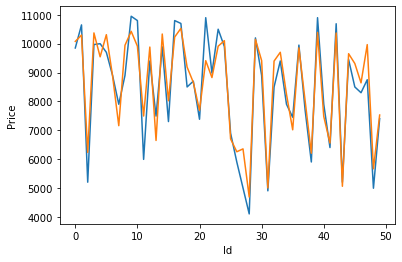

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Price',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

[]

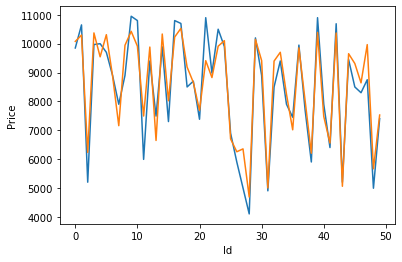

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Id',y='Price',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

In [49]:
new=[[51,2197,70000,1,1,0,0]]

In [50]:
real=reg.predict(new)

In [51]:
real

array([7857.45949044])

# Ridge Regression

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]
ridge = Ridge()
parameters = {'alpha': alpha}
ridge_regressor = GridSearchCV(ridge, parameters)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [53]:
ridge_regressor.best_params_

{'alpha': 30}

In [54]:
ridge=Ridge(alpha=30)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

578069.1348754482

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)


0.8431791744587432

In [57]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_ridge
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,776,9850,10073.489785,0
1,487,10650,10293.318926,1
2,1462,5199,6250.181303,2
3,89,9970,10368.300682,3
4,852,9999,9540.320853,4
5,12,9700,10307.799776,5
6,353,8900,8902.872087,6
7,76,7900,7176.381624,7
8,633,8900,9963.615342,8
9,181,10950,10423.047838,9


[]

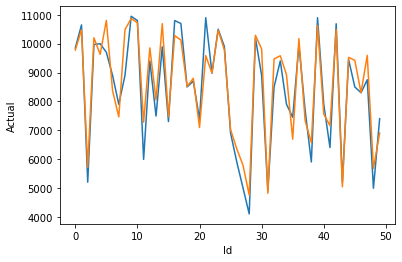

In [67]:
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

# Randomforest Classifier

In [68]:
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tun
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
n_estimators=[25,50,75,100,125,150,175,200] #number of decision trees in the forest
criterion=['squared_error'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go ti
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}
RFC_reg=GridSearchCV(reg,parameters)
RFC_reg.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [69]:
#RFC_reg.best_params_

In [70]:
#reg=RandomForestRegressor(n_estimators=125,criterion='mse',max_depth=5)

In [71]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
y_pred=reg.predict(X_test)

In [73]:
y_pred

array([ 9814.        , 10492.        ,  5647.1       , 10187.4       ,
        9671.83333333, 10831.5       ,  8539.        ,  7257.27      ,
       10483.78      , 10867.79      , 10718.        ,  7546.        ,
        9891.43047619,  8006.02      , 10710.        ,  7314.3       ,
       10269.58      , 10227.85      ,  8578.        ,  8770.18900794,
        7289.59      ,  9609.4       ,  8978.14593329, 10528.3       ,
        9741.9       ,  7101.79      ,  6507.96      ,  5817.62      ,
        4857.99      , 10271.2       ,  9765.78      ,  4697.78      ,
        9543.23      ,  9596.5       ,  8871.9       ,  6726.        ,
       10215.7       ,  7379.        ,  6393.1       , 10654.3       ,
        7700.69      ,  7077.83      , 10517.1       ,  5197.5       ,
        9471.2       ,  9364.3       ,  8345.5       ,  9582.9       ,
        5645.2       ,  6883.3       ,  5356.27      ,  9101.69      ,
        9993.        , 10068.5       ,  6176.6       ,  5670.36      ,
      

In [74]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,776,9850,9814.000000,0
1,487,10650,10492.000000,1
2,1462,5199,5647.100000,2
3,89,9970,10187.400000,3
4,852,9999,9671.833333,4
5,12,9700,10831.500000,5
6,353,8900,8539.000000,6
7,76,7900,7257.270000,7
8,633,8900,10483.780000,8
9,181,10950,10867.790000,9


[]

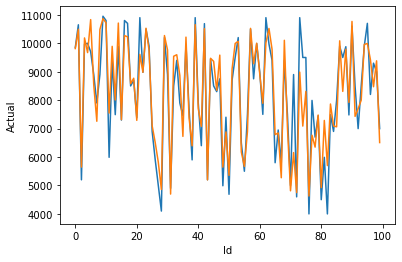

In [75]:
sns.lineplot(x='Id',y='Actual',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()